In [1]:
from collections import Counter
import numpy as np
from nilearn.decomposition import CanICA
from nilearn import plotting               #nilearn 图像功能
from nilearn import image, datasets
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

D:\anaconda\envs\mne\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
dataset_haxby = datasets.fetch_haxby() #haxby dataset
dataset_miyawaki = datasets.fetch_miyawaki2008()
dataset_development_fmri = datasets.fetch_development_fmri(n_subjects=1)

In [5]:
haxby_mask_path = dataset_haxby.mask_vt[0]
haxby_func_sub02_path = dataset_haxby.func[0]
haxby_nifti_masker = NiftiMasker(mask_img=haxby_mask_path, standardize=True)

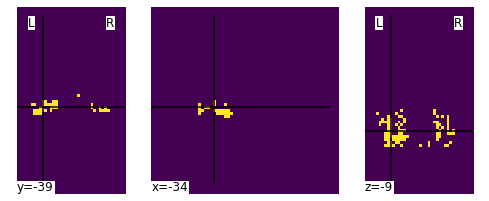

In [6]:
plotting.plot_img(haxby_nifti_masker.mask_img)

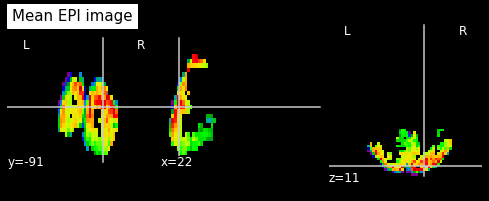

In [79]:
miyawaki_mean_img = image.mean_img(dataset_miyawaki.func[0])
plotting.plot_epi(miyawaki_mean_img, title='Mean EPI image')

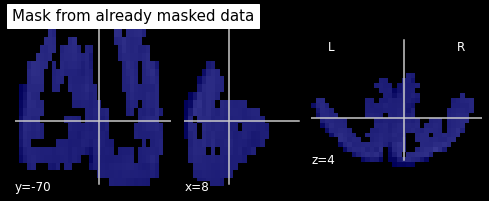

In [131]:
# with background making mask
miyawaki_nifti_masker = NiftiMasker()
miyawaki_nifti_masker.fit(dataset_miyawaki.func[0])
plotting.plot_roi(miyawaki_nifti_masker.mask_img_, miyawaki_mean_img, title='Mask from already masked data')

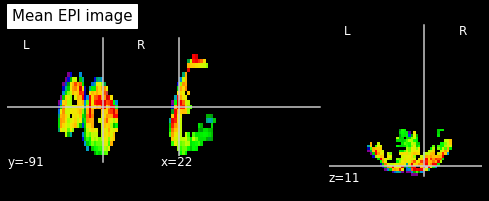

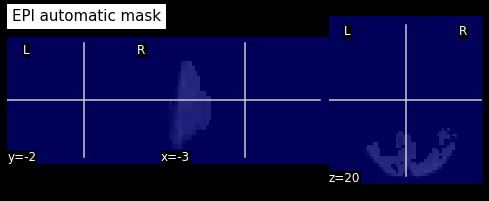

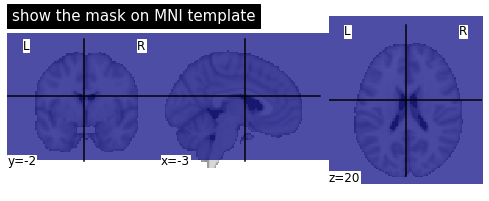

In [148]:
# with epi making mask
epi_miyawaki_path = dataset_miyawaki.func[0]
epi_miyawaki_img = image.index_img(epi_miyawaki_path, slice(0,100)) # 截取一段
epi_miyawaki_mean_img = image.mean_img(epi_miyawaki_img)
plotting.plot_epi(epi_miyawaki_mean_img, title='Mean EPI image')
miyawaki_nifti_masker_epi = NiftiMasker(mask_strategy='epi')
miyawaki_nifti_masker_epi.fit(epi_miyawaki_img)
plotting.plot_roi(miyawaki_nifti_masker_epi.mask_img_, epi_miyawaki_mean_img, title='EPI automatic mask')
plotting.plot_roi(miyawaki_nifti_masker_epi.mask_img_, title = 'show the mask on MNI template')

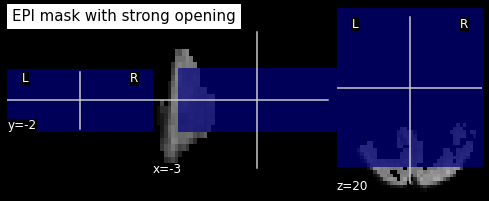

In [151]:
# slight adjustment
miyawaki_nifti_masker_epi_ad = NiftiMasker(mask_strategy='epi', mask_args=dict(opening=10))
miyawaki_nifti_masker_epi_ad.fit(epi_miyawaki_img)
plotting.plot_roi(miyawaki_nifti_masker_epi_ad.mask_img_, epi_miyawaki_mean_img, title='EPI mask with strong opening')


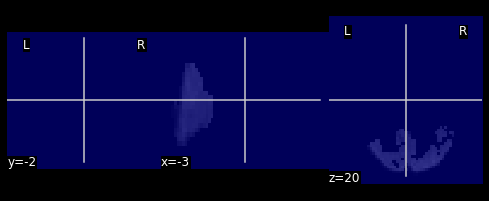

In [154]:
# making mask with boundary
miyawaki_nifti_masker_epi_bd = NiftiMasker(mask_strategy='epi', mask_args = dict(upper_cutoff=0.9, lower_cutoff=0.8, opening=False))
miyawaki_nifti_masker_epi_bd.fit(epi_miyawaki_img)
plotting.plot_roi(miyawaki_nifti_masker_epi_bd.mask_img_, miyawaki_mean_img )


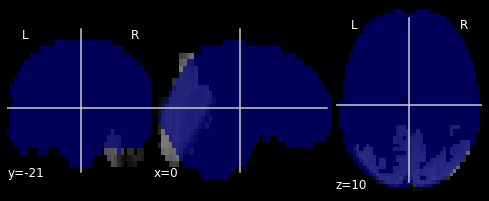

In [156]:
# with template making mask
template_miyawaki_masker = NiftiMasker(mask_strategy='template')
template_miyawaki_masker.fit(epi_miyawaki_img)
plotting.plot_roi(template_miyawaki_masker.mask_img_, miyawaki_mean_img)

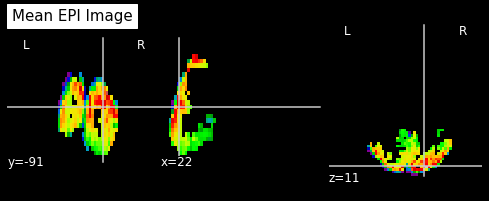

In [159]:
miyawaki_func_path = dataset_miyawaki.func[0]
miyawaki_func_mean_img = image.mean_img(miyawaki_func_path)
plotting.plot_epi(miyawaki_func_mean_img, title='Mean EPI Image')

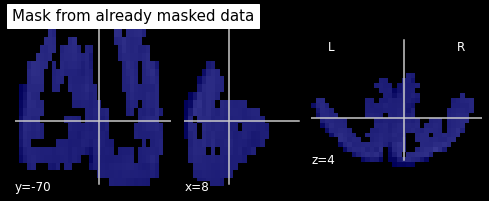

In [162]:
miyawaki_masker_bg = NiftiMasker()
miyawaki_masker_bg.fit(miyawaki_func_path)

plotting.plot_roi(miyawaki_masker_bg.mask_img_, miyawaki_mean_img, title = 'Mask from already masked data')
#miyawaki_masker_bg.generate_report()

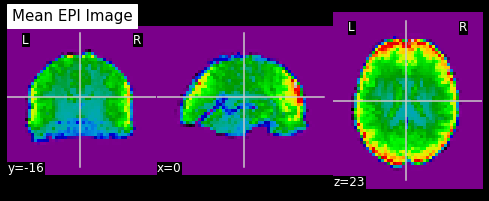

In [168]:
# from raw epi to generate the mask
development_fmri_epi_path = dataset_development_fmri.func[0]
development_fmri_epi_img = image.index_img(development_fmri_epi_path, slice(1, 100))

development_fmri_epi_mean_img = image.mean_img(development_fmri_epi_img)
plotting.plot_epi(development_fmri_epi_mean_img, title='Mean EPI Image')

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1


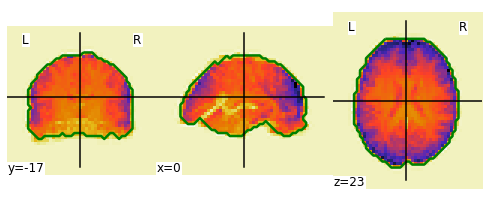

In [169]:
development_fmri_masker_epi = NiftiMasker(mask_strategy='epi')
development_fmri_masker_epi.fit(development_fmri_epi_img)
development_fmri_masker_epi.generate_report()

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,{'opening': 10}
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1


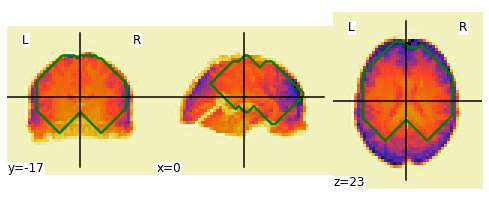

In [176]:
# slight adjustment
development_fmri_masker_epi = NiftiMasker(mask_strategy='epi', mask_args=dict(opening=10))
development_fmri_masker_epi.fit(development_fmri_epi_img)
development_fmri_masker_epi.generate_report()

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,"{'upper_cutoff': 0.9, 'lower_cutoff': 0.8, 'opening': False}"
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1


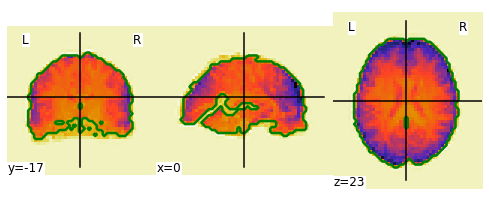

In [177]:
development_fmri_masker_epi = NiftiMasker(mask_strategy='epi', mask_args=dict(upper_cutoff=.9, lower_cutoff=.8, opening=False))
development_fmri_masker_epi.fit(development_fmri_epi_img)
development_fmri_masker_epi.generate_report()

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,background
memory,Memory(location=None)
memory_level,1


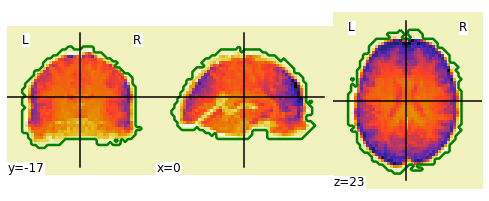

In [179]:
#基于背景的会把一些颅骨包含进来，基于EPI的只将符合epi数值的体素包含进来，基于template的就是单纯利用设定模板进行mask的生成
development_fmri_masker_bg = NiftiMasker()
development_fmri_masker_bg.fit(development_fmri_epi_img)
development_fmri_masker_bg.generate_report()

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,template
memory,Memory(location=None)
memory_level,1


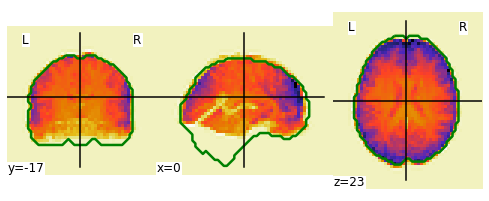

In [180]:
development_fmri_masker_tp = NiftiMasker(mask_strategy='template')
development_fmri_masker_tp.fit(development_fmri_epi_img)
development_fmri_masker_tp.generate_report()